In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

import requests
import zipfile
import tempfile

import shutil
import os

folder = tempfile.mkdtemp()

shape_url = "https://opendata.arcgis.com/datasets/d5c9c1d89a5a44e9a7f88f182ffe5ba2_2.zip?outSR=%7B%22latestWkid%22%3A27700%2C%22wkid%22%3A27700%7D"

shapefile = "Wards_December_2016_Generalised_Clipped_Boundaries_in_the_UK.shp"

def download(url, local):
    r = requests.get(url, stream=True)
    if r.status_code == 200:
        with open(local, 'wb') as f:
            r.raw.decode_content = True
            shutil.copyfileobj(r.raw, f)    
    print(f"Downloaded {url}")

def get_zipfile(url, d):
    file = tempfile.mkstemp(dir=d)[1]
    download(url, file)
    with zipfile.ZipFile(file) as myzip:
        myzip.extractall(folder)


get_zipfile(shape_url, folder)
      

map_frame = gpd.read_file(os.path.join(folder, shapefile))
map_frame['lad'] = map_frame["lad16nm"].str.lower()


Downloaded https://opendata.arcgis.com/datasets/d5c9c1d89a5a44e9a7f88f182ffe5ba2_2.zip?outSR=%7B%22latestWkid%22%3A27700%2C%22wkid%22%3A27700%7D


(-32904.24233500031, 688432.8474349997, -55405.24029000039, 1281049.441689999)

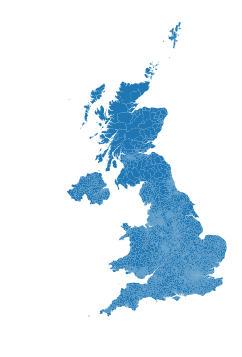

In [52]:

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(12, 6))

map_frame.plot(ax = ax)

# remove the axis
ax.axis('off')


In [11]:

eu_results_url = "http://www.electoralcommission.org.uk/__data/assets/file/0004/175063/European-Parliament-elections-2014-Electoral-data.zip"

get_zipfile(eu_results_url, folder)

Downloaded http://www.electoralcommission.org.uk/__data/assets/file/0004/175063/European-Parliament-elections-2014-Electoral-data.zip


In [12]:
eu_results_file = "EPE 2014 - Electoral data - RESULTS.csv"

In [13]:
results = pd.read_csv(os.path.join(folder, eu_results_file))

In [20]:
results["lad"] = results["Local Authority"].str.lower()


In [118]:
results.drop("Unnamed: 4", axis=1, inplace=True)

KeyError: "['Unnamed: 4'] not found in axis"

In [116]:
map_frame['lad'] = map_frame["lad16nm"].str.lower()

In [117]:
list(results)

['Local Authority',
 ' Eligible Electorate ',
 ' Total number of valid votes counted  ',
 'Valid vote % turnout',
 ' Con ',
 ' Lab ',
 ' LD ',
 ' UKIP ',
 ' Green ',
 ' BNP ',
 ' SNP ',
 ' PC ',
 ' An Ind ',
 ' Animal Wel ',
 ' Brit First ',
 ' Christian ',
 ' Communities ',
 ' Eng Dem ',
 ' Europ ',
 ' 4 Free ',
 ' Harmony ',
 ' Liberty ',
 ' Nat Health ',
 ' Nat Lib ',
 ' No2EU ',
 ' Peace ',
 ' Pirate ',
 ' Roman ',
 ' SEP ',
 ' Soc Lab ',
 ' SPGB ',
 ' We Demand ',
 ' York First ',
 ' YOURvoice ',
 ' TUV ',
 ' SF ',
 ' SDLP ',
 ' DUP ',
 ' All ',
 ' Aspire ',
 ' UUP ',
 'Unnamed: 42',
 'lad',
 'max']

In [64]:
joined = map_frame.set_index("lad").join(results.set_index("lad"))

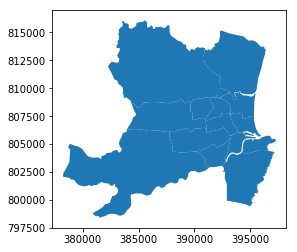

In [93]:
joined.loc["aberdeen city", [ "geometry"]].plot()